# SRMouse &#x1F42D; Demo 

## Importing packages 

In [38]:
import os 
import cv2
import sys 
from pathlib import Path 
from matplotlib import pyplot as plt 

In [2]:
from srmouse.viz import histSoilSample
from srmouse.viz import showManualPoint
from srmouse.processor import SpectralCube
from srmouse.processor import LoadMeasurements
from srmouse.viz import plotReflectanceSignature
from srmouse.viz import plotReflectanceSignatures
from srmouse.imageTools import manualCropPetriDishe
from srmouse.processor import ReflectancePointLoader

## Paths to test data 

In [3]:
root = str(Path(os.path.abspath('')).parent.absolute())

In [4]:
path2test = Path(os.path.join(root, 
                 "data/CPR-ATL-KET_control/Data/Spectrum_Data.txt")).resolve()
path2spectralCube = Path(os.path.join(root,
                         'data/CPR-ATL-KET_control/Spectral_Cube/')).resolve()
path2rgbImage = Path(os.path.join(root,
                     'data/CPR-ATL-KET_control/Images/RGB_image.png')).resolve()
path2measurements = Path(os.path.join(root,
                         'data/')).resolve()

##  Using the package

In [5]:
oRP = ReflectancePointLoader(path2test)

In [6]:
dfPointsReflectances = oRP.getResults()

In [7]:
dfPointsReflectances.head()
# The columns represents the loaded bands and the rows represent the 
# measured points in the experiments 
# NOTE: The first point in this measurement represent a calibration point 

,365,400,465,540,640,700,750,800,850,900,950,1000
0,94.50980,100.0000,100.0000,100.00000,100.00000,100.00000,100.00000,99.60780,99.60780,99.60780,99.60780,99.21570
1,12.94120,16.0784,14.1176,11.76470,13.33330,6.27451,6.27451,7.05882,9.01961,9.41176,9.01961,11.37250
2,7.05882,14.9020,12.5490,10.19610,11.37250,5.49020,5.88235,6.27451,7.84314,8.62745,8.62745,10.19610
3,7.45098,16.4706,12.9412,10.98040,11.37250,5.09804,5.88235,6.66667,8.23529,8.62745,9.41176,10.58820
4,10.19610,14.9020,12.1569,9.01961,9.01961,4.31373,4.70588,5.09804,6.27451,7.05882,7.84314,8.62745


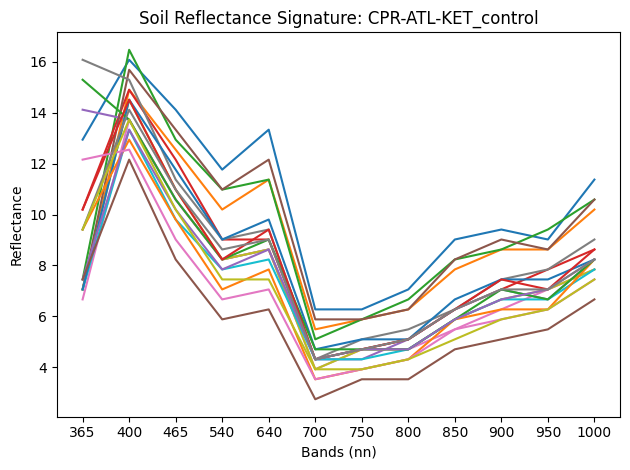

In [8]:
# Ploting the reflectance signature per point 
plotReflectanceSignature(dfPointsReflectances,
                         idx2skip=0,
                         title='Soil Reflectance Signature: CPR-ATL-KET_control',
                         avgPlot=False)

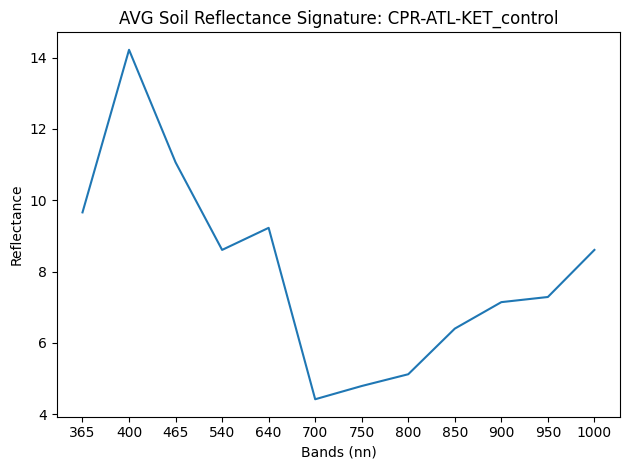

In [9]:
# Ploting the Average reflectance signature of the sample  
plotReflectanceSignature(dfPointsReflectances,
                         idx2skip=0,
                         title='AVG Soil Reflectance Signature: CPR-ATL-KET_control',
                         avgPlot=True)

In [10]:
## Loading the whole set of mesasurements 
lstValues, lstNames = LoadMeasurements(path2measurements)

In [11]:
lstValues[3].head()

,365,400,465,540,640,700,750,800,850,900,950,1000
0,100.00000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,99.6078,99.6078,99.6078,99.6078,99.6078
1,11.37250,22.3529,21.1765,23.9216,31.7647,15.6863,16.4706,16.8627,19.6078,20.3922,18.0392,21.5686
2,9.80392,21.1765,20.3922,22.7451,29.4118,14.5098,16.0784,16.4706,18.8235,19.6078,18.4314,20.7843
3,9.80392,20.3922,19.6078,21.1765,27.4510,13.3333,15.2941,15.6863,17.6471,18.4314,18.0392,19.6078
4,10.19610,20.0000,18.4314,20.3922,26.2745,12.9412,15.2941,14.9020,16.8627,17.6471,17.6471,18.8235


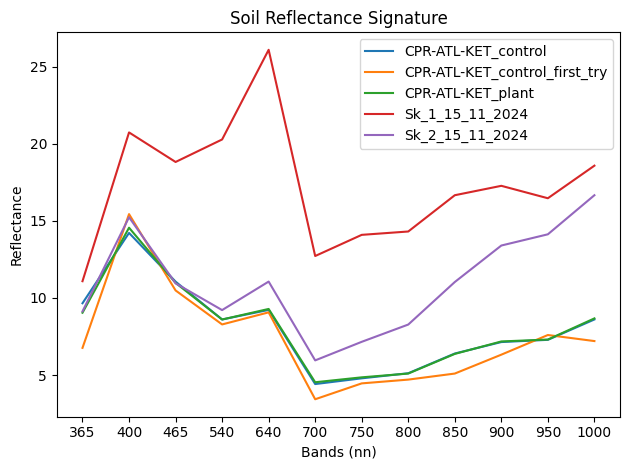

In [12]:
## Plot the AVG sginature per measuremed sample - Skip index 0 Calibration measurement
plotReflectanceSignatures(lstValues, 
                           idx2skip=0,
                           avgPlot=True, 
                           filesNames=lstNames)

In [13]:
## Load the spectral cube - Multispectral images 
sc_ex = SpectralCube(path2spectralCube)

In [25]:
# Coordinates where the reflectance need to be measured  
Point0 = [1500, 900]
Point1 = [1500, 700]
# Base kernel size - This example will create a kernel of 2x2
kernel = 2 

In [26]:
dfManualSample = sc_ex.getSignature([Point0, Point1], cSize=2)

In [27]:
dfManualSample.head()

,365,400,465,540,640,700,750,800,850,900,950,1000
0,60.25,102.25,62.75,51.50,55.0,23.25,23.0,23.0,28.5,29.0,26.5,31.5
1,56.00,101.75,59.25,53.25,57.0,27.50,26.5,21.5,28.5,29.5,24.5,33.0


In [28]:
img = cv2.imread(path2rgbImage,
                 cv2.COLOR_BGR2RGB)

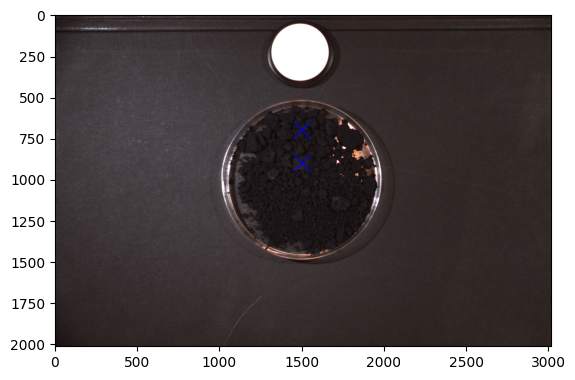

In [30]:
showManualPoint(img,
               [Point0, Point1],
               cross=50)

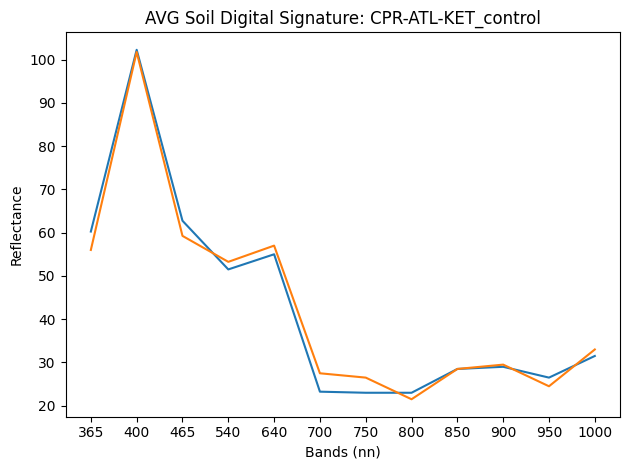

In [33]:
plotReflectanceSignature(dfManualSample,
                         idx2skip=-1,
                         title='AVG Soil Digital Signature: CPR-ATL-KET_control',
                         avgPlot=False)

In [46]:
## Selecting the petri deish 
segmented = manualCropPetriDishe(img,
                     [1500, 1000],
                     450,
                     False, # Return Mask
                     )

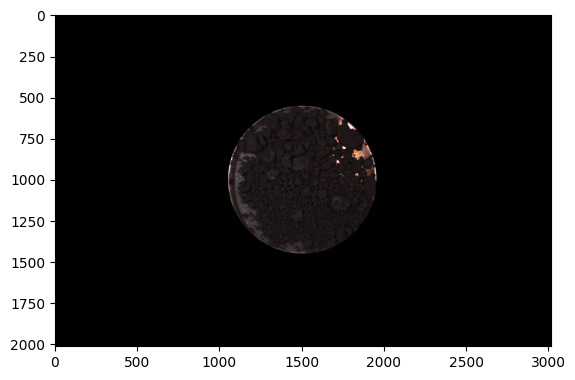

In [47]:
plt.imshow(segmented)

In [48]:
mask = manualCropPetriDishe(img,
                     [1500, 1000],
                     450,
                     True,
                     )

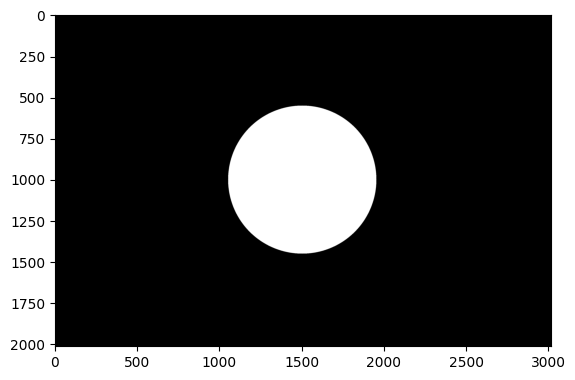

In [49]:
plt.imshow(mask,
          cmap='gray')

In [51]:
multispectralImageDN = sc_ex.getCube()

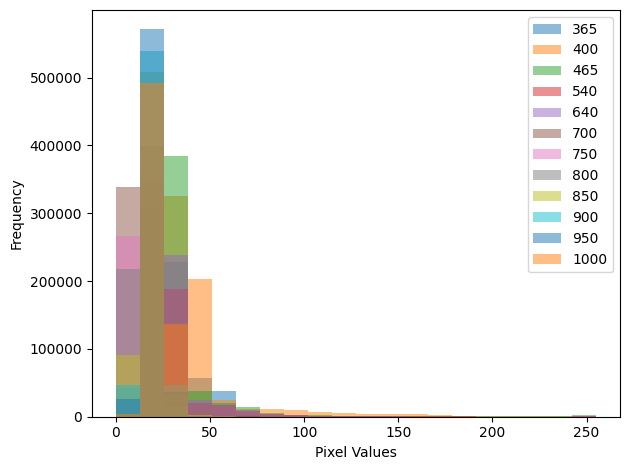

In [52]:
histSoilSample(multispectralImageDN, 
               mask, 
               legend=sc_ex.getBands())